<center> <h1 style="background-color:darkblue; color:white" > Market Research in Hanoi, Vietnam </h1> 
<img
src="https://www.tripsavvy.com/thmb/t_dhdyr1DPi8AEN6woRYCX02Ry0=/2107x1185/smart/filters:no_upscale()/GettyImages-520483268-5a8001f5d8fdd50037283bae.jpg" style="width:100%;height:30%;">
</center>

<div class="list-group" id="list-tab" role="tablist">
<center>  <h3 class="list-group-item list-group-item-action active" style="background-color:DarkSlateBlue; color:white" data-toggle="list"  role="tab" aria-controls="home"> Table of Content </h3>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#description" role="tab" aria-controls="profile" style="color:DarkSlateBlue">Project's Description<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">1</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#data" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Data Presentation & Methodology <span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">2</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#crawl" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Crawl Demographic Data from Wikipedia<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">3</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#house" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Crawl Housing Prices from Real Estate Website<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">4</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#complete" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Complete Dataset<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">5</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#explore" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Explore Hanoi<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">6</span></a>  
   <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#group" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Examine 3 groups of districts<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">7</span></a> </center>

## <font color='darkblue'> Part 1. Project’s description </font><a id='decription'></a> 

Hanoi is the Capital of Vietnam and is a leading city with a significant role in the country's growth. Because of its dense population and openness to new opportunities, Hanoi is an ideal place for investors for entrepreneurs to start their businesses or make valuable investments. However, from an investor’s perspective, it will be hard to determine which type of business to open and in which area that business could be attractive to customers and give optimal profit to the owner. By using Data Science and exploring some geometric data of Hanoi, you can have an overview of the area and understand the general characteristics of different districts in Hanoi. To provide investors with this information, answering some of the questions below is necessary.

1. How many venues are in each district? Answering this question gives us a better understanding of the dynamic level of a neighborhood.
2. How many categories are in each district? Answering this question helps us know which services the districts offer and how diverse the business operations in these districts are.
3. What are the top categories in each district? Based on this question, investors can get a hold of the districts’ characteristics. (E.g: Is it an entertainment center? Is it a food center?)
4. If we divide the clusters into 3 groups, what can we see about the characteristics of these groups?
5. If we visualize all information on the map, what does it look like?


## <font color='darkblue'> Part 2. Data presentation & Methodology </font><a id='data'></a> 

### <font color='darkblue'> Data presentation

In order to answer the questions, there is some data that we need to collect.

1.	Information of Hanoi City (HNC)’s districts from Wikipedia. It gives us a list of all main districts of HNC with their area (in Km2), population (in 2017) and the density of each district (people/Km2). Wiki page: https://en.wikipedia.org/wiki/Hanoi 
2.	List of the coordinates (latitude, longitude) of all districts in HNC. This list can be generated from the package geopy.geocoders.Nominatim.
3.	List of average housing prices per m2 in HNC. The list is updated through https:
//mogi.vn/gia-nha-dat. 


### <font color='darkblue'> Methodology
1.	First, we need to collect the data by crawling the table of Hanoi’s districts’ information on the wikipedia page and the average housing price on a website. The BeautifulSoup package is used for the scrapping.
2.	The column Density is calculated by dividing Population by area of each district.
3.	Numpy and pandas are the most frequent used packages to manipulate dataframes in this project.
4.	geopy.geocoders.Nominatim is used to get the coordinates of districts and add them to the main data frame.
5.	Folium package is used to visualize the HNC map with its districts. 
6.	Foursquare API is used to explore the venues in each district
7.	K-Means Clustering method is implemented to segment the districts. We then examine the characteristics of each district cluster based on venue observation. 
8.	In order to visualize the charts, seaborn is used.
9.	Package folium is used to visualize the clusters on the map. 

## <font color='darkblue'> Part 3. Crawling demographic data from Wikipedia <a id='crawl'></a> 

In [208]:
## import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from unidecode import unidecode
import seaborn as sns
import numpy as np

import warnings

warnings.filterwarnings("ignore")
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [146]:
# Site URL
url = "https://en.wikipedia.org/wiki/Hanoi"

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

# Find table without class, use attribute instead
a = soup.find_all("table", {"cellpadding": "0"})
print("Number of tables on site: ", len(a))
a1 = a[3]

# Find rows of the table (tr tag)
table_rows = a1.find_all("tr")

# Find headers (headings are under th tag)
head = table_rows[1]
headings = []
for item in head.find_all("th"):
    item = (item.text).rstrip("\n")
    headings.append(item)

# Body is under the tag “td”
demographics = []
for tr in table_rows:
    district_demo = tr.find_all("td")
    row_demo = [tr.text for tr in district_demo]
    demographics.append(row_demo)

# Fetch needed rows
demographics2 = demographics[4:37]
demographics3 = pd.DataFrame(data=demographics2, columns=headings)
demographics3 = demographics3.iloc[:, 0:4]
demographics3.rename(columns={demographics3.columns[1]: "Area (km2)"}, inplace=True)

# Customize data format
for col in demographics3.columns:
    demographics3[col] = demographics3[col].str.replace("\n", "").str.strip()

demographics3["Name"] = demographics3["Name"].map(lambda x: re.sub(r"HT", "", x))
demographics4 = demographics3.drop(demographics3.index[[12, 13, 15]])
demographics4["Area (km2)"] = demographics4["Area (km2)"].apply(
    lambda x: x.replace(".", "")
)
for j in ["Population density", "Population (2022)"]:
    demographics4[j] = demographics4[j].apply(lambda x: x.replace(",", ""))

for i in demographics4.columns[1:]:
    demographics4[i] = demographics4[i].astype(float)

# Change names to English format
demographics4["Name"] = demographics4["Name"].apply(unidecode).str.strip()

Number of tables on site:  4


<IPython.core.display.Javascript object>

In [147]:
demographics4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 32
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                30 non-null     object 
 1   Area (km2)          30 non-null     float64
 2   Population (2022)   30 non-null     float64
 3   Population density  30 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


<IPython.core.display.Javascript object>

In [148]:
demographics4.head()

,Name,Area (km2),Population (2022),Population density
0,Ba Dinh district,921.0,226315.0,24572.0
1,Bac Tu Liem district,4535.0,354364.0,7813.0
2,Cau Giay district,1226.0,294235.0,23999.0
3,Dong Da district,995.0,376709.0,37860.0
4,Ha Dong district,4964.0,382637.0,7708.0


<IPython.core.display.Javascript object>

## <font color='darkblue'> Part 4. Crawling housing price data from Real Estate Website <a id='house'></a> 

In [181]:
# Identify table
source_housing_price = requests.get("https://mogi.vn/gia-nha-dat").text
soup = BeautifulSoup(source_housing_price, "lxml")
table_housing_price = soup.findAll("div", class_="mt-table")[1]

# Fetch all row+ table
table_rows = table_housing_price.find_all("div", class_="mt-row")
housing_price = []
for tr in table_rows:
    district = tr.find("div", class_="mt-street").a.text
    medium_price = tr.find("div", class_="mt-vol text-right number").span.text
    row = [district, medium_price]
    housing_price.append(row)

# Make a dataframe
house_price2 = pd.DataFrame(
    housing_price, columns=["District", "Average Housing Price (1M VND/m2)"]
)

# Remove the word "Quận" and word formating
house_price2["District"] = (
    house_price2["District"].str.replace("\n", "").str.replace("Quận", "").str.strip()
)

house_price2["Average Housing Price (1M VND/m2)"] = (
    house_price2["Average Housing Price (1M VND/m2)"]
    .str.replace("triệu", "")
    .str.replace(",", ".")
    .str.replace("/m2", "")
    .str.strip()
)
# Remove Vietnamese accents
house_price2["District"] = house_price2["District"].apply(unidecode)

# Rename Column
house_price2 = house_price2.rename(
    columns={house_price2.columns[1]: "Avg Price (mil/m2)"}
)

<IPython.core.display.Javascript object>

In [182]:
house_price2.head()

,District,Avg Price (mil/m2)
0,Ba Dinh,206
1,Cau Giay,204
2,Dong Da,199
3,Hai Ba Trung,209
4,Hoan Kiem,556


<IPython.core.display.Javascript object>

## <font color='darkblue'> Part 5. Complete dataset <a id='complete'></a> 

In [186]:
# Format to merge data
demographics4["Name"] = demographics4["Name"].str.replace("district", "").str.strip()

# Merge
data_hanoi = pd.merge(
    demographics4, house_price2, how="right", right_on="District", left_on="Name"
).drop(columns={"Name"})

# Remove null
hanoi_data = data_hanoi[~data_hanoi["Population density"].isnull()]

<IPython.core.display.Javascript object>

In [201]:
hanoi_data

,Area (km2),Population (2022),Population density,District,Avg Price (mil/m2)
0,921.0,226315.0,24572.0,Ba Dinh,206
1,1226.0,294235.0,23999.0,Cau Giay,204
2,995.0,376709.0,37860.0,Dong Da,199
3,1026.0,304101.0,29639.0,Hai Ba Trung,209
4,535.0,141687.0,26483.0,Hoan Kiem,556
5,4019.0,540732.0,13454.0,Hoang Mai,103
6,6009.0,337982.0,5624.0,Long Bien,107
7,2438.0,167851.0,6884.0,Tay Ho,193
8,917.0,293292.0,31983.0,Thanh Xuan,159
9,4964.0,382637.0,7708.0,Ha Dong,108


<IPython.core.display.Javascript object>

### <font color='darkblue'> Get the coordinates of the districts

In [204]:
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

import folium  # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# find the distances
from scipy.spatial.distance import cdist

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [205]:
def find_coor(name):
    #     address = name + "Hanoi City Vietnam"
    geolocator = Nominatim(user_agent="hnc")
    location = geolocator.geocode(name + " hanoi")
    latitude = location.latitude
    longitude = location.longitude
    return [latitude, longitude]

<IPython.core.display.Javascript object>

In [207]:
coords = [find_coor(dist + " District") for dist in hanoi_data["District"].iloc[:].tolist()]
df_coords = pd.DataFrame(coords, columns=["Latitude", "Longitude"])
hanoi_data["Latitude"] = df_coords["Latitude"]
hanoi_data["Longitude"] = df_coords["Longitude"]
hanoi_data

<ipython-input-207-0ed2b29f542e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hanoi_data["Latitude"] = df_coords["Latitude"]
<ipython-input-207-0ed2b29f542e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hanoi_data["Longitude"] = df_coords["Longitude"]


,Area (km2),Population (2022),Population density,District,Avg Price (mil/m2),Latitude,Longitude
0,921.0,226315.0,24572.0,Ba Dinh,206,21.034709,105.824511
1,1226.0,294235.0,23999.0,Cau Giay,204,21.027277,105.791464
2,995.0,376709.0,37860.0,Dong Da,199,21.014515,105.823519
3,1026.0,304101.0,29639.0,Hai Ba Trung,209,21.005755,105.860326
4,535.0,141687.0,26483.0,Hoan Kiem,556,21.028529,105.850692
5,4019.0,540732.0,13454.0,Hoang Mai,103,20.975535,105.857447
6,6009.0,337982.0,5624.0,Long Bien,107,21.044559,105.918675
7,2438.0,167851.0,6884.0,Tay Ho,193,21.068415,105.823941
8,917.0,293292.0,31983.0,Thanh Xuan,159,20.993687,105.814301
9,4964.0,382637.0,7708.0,Ha Dong,108,20.953590,105.759982


<IPython.core.display.Javascript object>

### <font color = 'darkblue'> Plot the map of Hanoi city with these districts
          

In [210]:
[hn_lat, hn_long] = find_coor("")
print("The geographical coordinates of Hanoi City are {}, {}.".format(hn_lat, hn_long))

The geographical coordinates of Hanoi City are 21.0294498, 105.8544441.


<IPython.core.display.Javascript object>

In [211]:
map_hn = folium.Map(location=[hn_lat, hn_long], zoom_start=12)
for lat, lng, dis in zip(
    hanoi_data["Latitude"], hanoi_data["Longitude"], hanoi_data["District"]
):
    label = "{}".format(dis)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color="blue",
        fill=True,
        fill_color="#3186cc",
        fill_opacity=0.7,
        parse_html=False,
    ).add_to(map_hn)

map_hn

<IPython.core.display.Javascript object>

### <font color = 'darkblue'> Find out about each district's neighborhood

In [212]:
CLIENT_ID = "5ODBH5ASCVXDMJBQCFTK31SLJF24KTGO12IOJQZZLX0QDBBT"
CLIENT_SECRET = "BNV2LP4YSWVNGDXP2E24OXSIMP5W2B1QIXULRV4ZHR000EJO"
VERSION = "20201109"

<IPython.core.display.Javascript object>

In [213]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500, LIMIT=150):
    venues_list = []

    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT
        )

        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]

        # return only relevant information for each nearby venue
        venues_list.append(
            [
                (
                    name,
                    lat,
                    lng,
                    v["venue"]["name"],
                    v["venue"]["location"]["lat"],
                    v["venue"]["location"]["lng"],
                    v["venue"]["categories"][0]["name"],
                )
                for v in results
            ]
        )

    nearby_venues = pd.DataFrame(
        [item for venue_list in venues_list for item in venue_list]
    )
    nearby_venues.columns = [
        "District",
        "District Latitude",
        "District Longitude",
        "Venue",
        "Venue Latitude",
        "Venue Longitude",
        "Venue Category",
    ]

    return nearby_venues

<IPython.core.display.Javascript object>

In [216]:
hn_venues = getNearbyVenues(
    names=hanoi_data["District"],
    latitudes=hanoi_data["Latitude"],
    longitudes=hanoi_data["Longitude"],
)

<IPython.core.display.Javascript object>

In [217]:
hn_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ba Dinh,21.034709,105.824511,Highlands Coffee,21.029605,105.827811,Coffee Shop
1,Ba Dinh,21.034709,105.824511,Polygon Music,21.029922,105.822862,Rock Club
2,Ba Dinh,21.034709,105.824511,Zennova Massage,21.029979,105.825851,Massage Studio
3,Ba Dinh,21.034709,105.824511,Chân Gà Nướng Việt Hà,21.030472,105.831805,BBQ Joint
4,Ba Dinh,21.034709,105.824511,Cơm Chay Hà Thành,21.032318,105.825379,Vegetarian / Vegan Restaurant


<IPython.core.display.Javascript object>

## <font color='darkblue'> Part 6. Explore Hanoi <a id='explore'></a> 

In [224]:
# Count venue catgories in each district
hn_venue_category_group = (
    hn_venues.groupby("District")
    .agg({"Venue Category": "nunique"})
    .sort_values("Venue Category", ascending=False)
    .reset_index()
)

<IPython.core.display.Javascript object>

**<font color = 'darkblue'> Total Categories in each district**

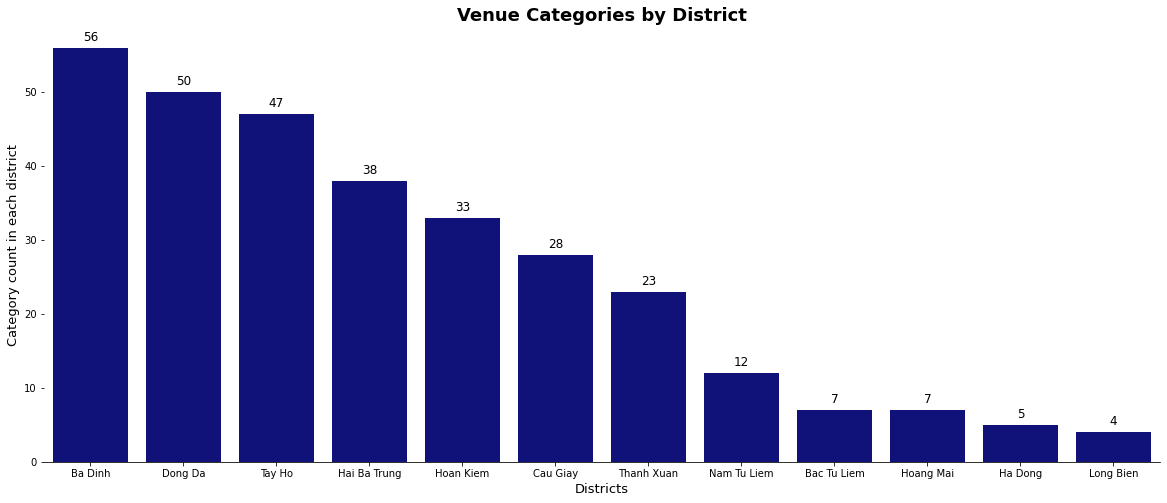

<IPython.core.display.Javascript object>

In [234]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
    data=hn_venue_category_group, x="District", y="Venue Category", color="darkblue"
)
sns.despine(left=True)
ax.set_xlabel("Districts", fontsize=13)
ax.set_ylabel("Category count in each district", fontsize=13)
ax.set_title("Venue Categories by District", fontsize=18, weight="bold")

# Value number on chart
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 1,
        "{:1.0f}".format(height),
        ha="center",
        fontsize=12,
    )

**<font color = 'darkblue'> Top 10 Categories in each district**

In [243]:
hn_venues

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ba Dinh,21.034709,105.824511,Highlands Coffee,21.029605,105.827811,Coffee Shop
1,Ba Dinh,21.034709,105.824511,Polygon Music,21.029922,105.822862,Rock Club
2,Ba Dinh,21.034709,105.824511,Zennova Massage,21.029979,105.825851,Massage Studio
3,Ba Dinh,21.034709,105.824511,Chân Gà Nướng Việt Hà,21.030472,105.831805,BBQ Joint
4,Ba Dinh,21.034709,105.824511,Cơm Chay Hà Thành,21.032318,105.825379,Vegetarian / Vegan Restaurant
...,...,...,...,...,...,...,...
593,Nam Tu Liem,20.991758,105.796799,Coffee 8x,21.001367,105.803205,Coffee Shop
594,Nam Tu Liem,20.991758,105.796799,Galaxy Cafe,21.001479,105.803222,Coffee Shop
595,Nam Tu Liem,20.991758,105.796799,Aroma Restaurant,21.003231,105.799577,Vietnamese Restaurant
596,Nam Tu Liem,20.991758,105.796799,V One Cafe,21.003376,105.791787,Café


<IPython.core.display.Javascript object>

In [244]:
# one hot encoding
hn_onehot = pd.get_dummies(hn_venues[["Venue Category"]], prefix="", prefix_sep="")

# add district column back to dataframe
hn_onehot["District"] = hn_venues["District"]

# move district column to the first column
fixed_columns = [hn_onehot.columns[-1]] + list(hn_onehot.columns[:-1])
hn_onehot = hn_onehot[fixed_columns]

# group the rows by district and by taking the mean of the frequency of occurrence of each category
hn_grouped = hn_onehot.groupby("District").mean().reset_index()
hn_grouped.head()

,District,Amphitheater,Arepa Restaurant,Armenian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Australian Restaurant,BBQ Joint,...,Tiki Bar,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wedding Hall,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Ba Dinh,0.0,0.00,0.01,0.01,0.0,0.000000,0.0,0.000000,0.010000,...,0.00,0.0,0.01,0.070000,0.0,0.01,0.01,0.02,0.0,0.0
1,Bac Tu Liem,0.0,0.00,0.00,0.00,0.0,0.142857,0.0,0.000000,0.000000,...,0.00,0.0,0.00,0.142857,0.0,0.00,0.00,0.00,0.0,0.0
2,Cau Giay,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.018868,0.018868,...,0.00,0.0,0.00,0.132075,0.0,0.00,0.00,0.00,0.0,0.0
3,Dong Da,0.0,0.01,0.00,0.00,0.0,0.010000,0.0,0.010000,0.020000,...,0.01,0.0,0.00,0.080000,0.0,0.00,0.01,0.00,0.0,0.0
4,Ha Dong,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.000000,0.000000,...,0.00,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.0,0.0


<IPython.core.display.Javascript object>

In [246]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ["st", "nd", "rd"]

# create columns according to number of top venues
columns = ["District"]
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most Common Venue".format(ind + 1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind + 1))

# create a new dataframe
hn_10 = pd.DataFrame(columns=columns)
hn_10["District"] = hn_grouped["District"]

for ind in np.arange(hn_grouped.shape[0]):
    hn_10.iloc[ind, 1:] = return_most_common_venues(
        hn_grouped.iloc[ind, :], num_top_venues
    )

hn_10

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ba Dinh,Coffee Shop,Café,Vietnamese Restaurant,Hotel,Japanese Restaurant,Pizza Place,Fried Chicken Joint,Korean Restaurant,Sushi Restaurant,Beer Garden
1,Bac Tu Liem,Bar,Paintball Field,Bubble Tea Shop,Café,Asian Restaurant,Vietnamese Restaurant,Clothing Store,Pastry Shop,Pakistani Restaurant,Palace
2,Cau Giay,Vietnamese Restaurant,Coffee Shop,Café,Japanese Restaurant,Hotel,Pizza Place,Multiplex,Fast Food Restaurant,Korean Restaurant,Shopping Mall
3,Dong Da,Coffee Shop,Café,Vietnamese Restaurant,Fast Food Restaurant,Bakery,Supermarket,Movie Theater,Seafood Restaurant,Restaurant,Karaoke Bar
4,Ha Dong,Bakery,Platform,Bus Station,History Museum,Coffee Shop,Park,Outdoors & Recreation,Paintball Field,Pakistani Restaurant,Palace
5,Hai Ba Trung,Vietnamese Restaurant,Coffee Shop,Japanese Restaurant,Café,Hotel,Dessert Shop,Pizza Place,Noodle House,BBQ Joint,Hotpot Restaurant
6,Hoan Kiem,Hotel,Vietnamese Restaurant,Coffee Shop,Noodle House,Café,Dessert Shop,Spa,Lounge,Vegetarian / Vegan Restaurant,BBQ Joint
7,Hoang Mai,Amphitheater,Vietnamese Restaurant,Electronics Store,Coffee Shop,Park,Grocery Store,Lake,Men's Store,Mexican Restaurant,Lounge
8,Long Bien,Fried Chicken Joint,Cafeteria,Coffee Shop,Shopping Mall,Amphitheater,Paintball Field,Pakistani Restaurant,Palace,Park,Pastry Shop
9,Nam Tu Liem,Café,Coffee Shop,Noodle House,Tea Room,Mobile Phone Shop,Outdoors & Recreation,Beer Bar,Grocery Store,Vietnamese Restaurant,Pharmacy


<IPython.core.display.Javascript object>

**<font color = 'darkblue'> Discover housing price in Hanoi**

In [256]:
hanoi_data

,Area (km2),Population (2022),Population density,District,Avg Price (mil/m2),Latitude,Longitude
0,921.0,226315.0,24572.0,Ba Dinh,206,21.034709,105.824511
1,1226.0,294235.0,23999.0,Cau Giay,204,21.027277,105.791464
2,995.0,376709.0,37860.0,Dong Da,199,21.014515,105.823519
3,1026.0,304101.0,29639.0,Hai Ba Trung,209,21.005755,105.860326
4,535.0,141687.0,26483.0,Hoan Kiem,556,21.028529,105.850692
5,4019.0,540732.0,13454.0,Hoang Mai,103,20.975535,105.857447
6,6009.0,337982.0,5624.0,Long Bien,107,21.044559,105.918675
7,2438.0,167851.0,6884.0,Tay Ho,193,21.068415,105.823941
8,917.0,293292.0,31983.0,Thanh Xuan,159,20.993687,105.814301
9,4964.0,382637.0,7708.0,Ha Dong,108,20.953590,105.759982


<IPython.core.display.Javascript object>

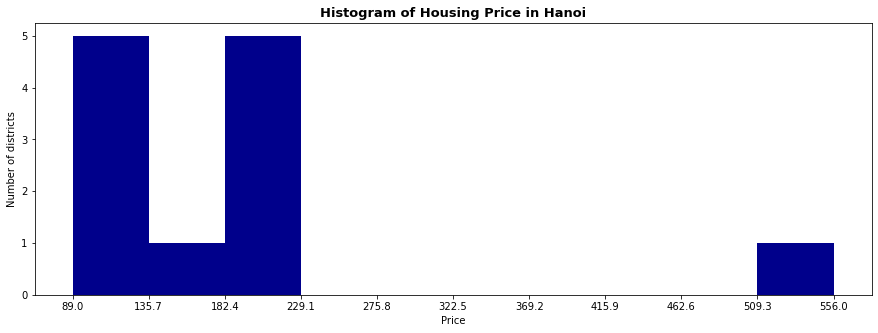

<IPython.core.display.Javascript object>

In [264]:
hanoi_data["Avg Price (mil/m2)"] = hanoi_data["Avg Price (mil/m2)"].astype(float)
count, bin_edges = np.histogram(hanoi_data["Avg Price (mil/m2)"])

hanoi_data["Avg Price (mil/m2)"].plot(
    kind="hist", figsize=(15, 5), xticks=bin_edges, color="darkblue"
)

plt.title(
    "Histogram of Housing Price in Hanoi", weight="bold", size=13
)  # add a title to the histogram
plt.ylabel("Number of districts")  # add y-label
plt.xlabel("Price")  # add x-label

plt.show()

- High price: Price>=229.1: 2
- Medium price: 135.7<Price<229.1: 1
- Low price: Price<=135.7: 0

In [265]:
def classify_price(price):
    if price <= 135.7:
        return 0
    elif price <= 229.1 and price > 135.7:
        return 1
    else:
        return 2

<IPython.core.display.Javascript object>

In [266]:
hanoi_data["Price evaluation"] = hanoi_data["Avg Price (mil/m2)"].apply(classify_price)

<IPython.core.display.Javascript object>

In [269]:
hanoi_data.head()

,Area (km2),Population (2022),Population density,District,Avg Price (mil/m2),Latitude,Longitude,Price evaluation
0,921.0,226315.0,24572.0,Ba Dinh,206.0,21.034709,105.824511,1
1,1226.0,294235.0,23999.0,Cau Giay,204.0,21.027277,105.791464,1
2,995.0,376709.0,37860.0,Dong Da,199.0,21.014515,105.823519,1
3,1026.0,304101.0,29639.0,Hai Ba Trung,209.0,21.005755,105.860326,1
4,535.0,141687.0,26483.0,Hoan Kiem,556.0,21.028529,105.850692,2


<IPython.core.display.Javascript object>

In [329]:
hn_grouped_cluster = pd.merge(
    hn_grouped,
    hanoi_data[["Population density", "Price evaluation", "District"]],
    on="District",
)

<IPython.core.display.Javascript object>

In [330]:
hn_grouped_cluster.head()

,District,Amphitheater,Arepa Restaurant,Armenian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Australian Restaurant,BBQ Joint,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wedding Hall,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Population density,Price evaluation
0,Ba Dinh,0.0,0.00,0.01,0.01,0.0,0.000000,0.0,0.000000,0.010000,...,0.01,0.070000,0.0,0.01,0.01,0.02,0.0,0.0,24572.0,1
1,Bac Tu Liem,0.0,0.00,0.00,0.00,0.0,0.142857,0.0,0.000000,0.000000,...,0.00,0.142857,0.0,0.00,0.00,0.00,0.0,0.0,7813.0,0
2,Cau Giay,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.018868,0.018868,...,0.00,0.132075,0.0,0.00,0.00,0.00,0.0,0.0,23999.0,1
3,Dong Da,0.0,0.01,0.00,0.00,0.0,0.010000,0.0,0.010000,0.020000,...,0.00,0.080000,0.0,0.00,0.01,0.00,0.0,0.0,37860.0,1
4,Ha Dong,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,7708.0,0


<IPython.core.display.Javascript object>

In [331]:
hn_merge = pd.merge(
    hn_10,
    hanoi_data[["Population density", "Price evaluation", "District"]],
    on="District",
)

<IPython.core.display.Javascript object>

## <font color='darkblue'> Part 7.  Using K-mean to group the districts into 3 main neigborhoods  <a id='group'></a> 

In [332]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(
    hn_grouped_cluster.iloc[:, 1:]
)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:]

array([0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2])

<IPython.core.display.Javascript object>

In [333]:
hn_merge.insert(0, "Cluster Labels", kmeans.labels_)

<IPython.core.display.Javascript object>

In [334]:
# Merge the latitude, longtitude back to the data clustered
hn_merge2 = pd.merge(
    hn_merge,
    hanoi_data[["District", "Latitude", "Longitude"]],
    how="left",
    on="District",
)

<IPython.core.display.Javascript object>

In [335]:
quintiles = (
    hn_merge2["Population density"]
    .quantile([0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    .to_dict()
)

<IPython.core.display.Javascript object>

In [336]:
def density_level(x):
    if x <= quintiles[0.4]:
        return 0
    elif x > quintiles[0.4] and x <= quintiles[0.8]:
        return 1
    else:
        return 2

<IPython.core.display.Javascript object>

In [337]:
hn_merge2["Density level"] = hn_merge2["Population density"].apply(density_level)

<IPython.core.display.Javascript object>

In [338]:
# create map
map_clusters = folium.Map(location=[hn_lat, hn_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
    hn_merge2["Latitude"],
    hn_merge2["Longitude"],
    hn_merge2["District"],
    hn_merge2["Cluster Labels"],
):
    label = folium.Popup(str(poi) + " Cluster " + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster - 1],
        fill=True,
        fill_color=rainbow[cluster - 1],
        fill_opacity=0.7,
    ).add_to(map_clusters)

map_clusters

<IPython.core.display.Javascript object>

### <font color = 'darkblue'> Examine each cluster group

In [339]:
cluster_0 = hn_merge2[hn_merge2["Cluster Labels"] == 0]

<IPython.core.display.Javascript object>

In [340]:
cluster_0

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population density,Price evaluation,Latitude,Longitude,Density level
0,0,Ba Dinh,Coffee Shop,Café,Vietnamese Restaurant,Hotel,Japanese Restaurant,Pizza Place,Fried Chicken Joint,Korean Restaurant,Sushi Restaurant,Beer Garden,24572.0,1,21.034709,105.824511,1
2,0,Cau Giay,Vietnamese Restaurant,Coffee Shop,Café,Japanese Restaurant,Hotel,Pizza Place,Multiplex,Fast Food Restaurant,Korean Restaurant,Shopping Mall,23999.0,1,21.027277,105.791464,1
5,0,Hai Ba Trung,Vietnamese Restaurant,Coffee Shop,Japanese Restaurant,Café,Hotel,Dessert Shop,Pizza Place,Noodle House,BBQ Joint,Hotpot Restaurant,29639.0,1,21.005755,105.860326,2
6,0,Hoan Kiem,Hotel,Vietnamese Restaurant,Coffee Shop,Noodle House,Café,Dessert Shop,Spa,Lounge,Vegetarian / Vegan Restaurant,BBQ Joint,26483.0,2,21.028529,105.850692,1


<IPython.core.display.Javascript object>

**Comment**
- These districts are the center of entertainment in the city, with a lot of Coffee, Restaurants, Shopping malls, and Multiplex. Especially, the foods offered in this area are diversified with different Asia cuisine (Japan, Korea, Vietnamese)
- The housing prices are from medium to high in these areas, with average population density. 
- Competitiveness in Cafe shops and restaurant is high

In [341]:
cluster_1 = hn_merge2[hn_merge2["Cluster Labels"] == 1]

<IPython.core.display.Javascript object>

In [342]:
cluster_1

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population density,Price evaluation,Latitude,Longitude,Density level
1,1,Bac Tu Liem,Bar,Paintball Field,Bubble Tea Shop,Café,Asian Restaurant,Vietnamese Restaurant,Clothing Store,Pastry Shop,Pakistani Restaurant,Palace,7813.0,0,21.073553,105.761706,0
4,1,Ha Dong,Bakery,Platform,Bus Station,History Museum,Coffee Shop,Park,Outdoors & Recreation,Paintball Field,Pakistani Restaurant,Palace,7708.0,0,20.953590,105.759982,0
7,1,Hoang Mai,Amphitheater,Vietnamese Restaurant,Electronics Store,Coffee Shop,Park,Grocery Store,Lake,Men's Store,Mexican Restaurant,Lounge,13454.0,0,20.975535,105.857447,1
8,1,Long Bien,Fried Chicken Joint,Cafeteria,Coffee Shop,Shopping Mall,Amphitheater,Paintball Field,Pakistani Restaurant,Palace,Park,Pastry Shop,5624.0,0,21.044559,105.918675,0
9,1,Nam Tu Liem,Café,Coffee Shop,Noodle House,Tea Room,Mobile Phone Shop,Outdoors & Recreation,Beer Bar,Grocery Store,Vietnamese Restaurant,Pharmacy,8774.0,0,20.991758,105.796799,0
10,1,Tay Ho,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Italian Restaurant,Wine Bar,Pastry Shop,Sports Bar,Sushi Restaurant,Tapas Restaurant,6884.0,1,21.068415,105.823941,0


<IPython.core.display.Javascript object>

**Comment**

- The population density level in this area is lower than in other groups. That might be why these districts have space for outdoor activities with Paintball Field, Park, Outdoors & Recreation, or Shopping Malls.
- It is obviously the central for foreigners as it has a lot of foreign restaurants (Pakistani restaurants, Mexican Restaurants, Sushi, etc.) and also pastry shops

In [344]:
cluster_2 = hn_merge2[hn_merge2["Cluster Labels"] == 2]

<IPython.core.display.Javascript object>

In [345]:
cluster_2

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population density,Price evaluation,Latitude,Longitude,Density level
3,2,Dong Da,Coffee Shop,Café,Vietnamese Restaurant,Fast Food Restaurant,Bakery,Supermarket,Movie Theater,Seafood Restaurant,Restaurant,Karaoke Bar,37860.0,1,21.014515,105.823519,2
11,2,Thanh Xuan,Coffee Shop,Café,Bakery,Mobile Phone Shop,Intersection,Ice Cream Shop,Moving Target,Multiplex,Noodle House,Buffet,31983.0,1,20.993687,105.814301,2


<IPython.core.display.Javascript object>

**Comment**
- The density levels in this area are high. As the housing prices are just average and the areas around are full of convenience with Restaurants, Supermarket, or Multicomplex, people find the living in these areas reasonable.  